In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [267]:
house_df = pd.read_csv("complete_houses_mod.csv", index_col="id")


df = house_df.loc[:, house_df.isnull().mean() < .8]
df

,Unnamed: 0,Zip,Price,Price of square meter,Living area,Number of rooms,Garden surface,Terrace surface,Open fire,Surface of the land,Number of facades,Swimming pool,Building Cond. values,Kitchen values,Primary energy consumption,Energy efficiency
id,,,,,,,,,,,,,,,,
10578809,0,1770,349000,1938.89,180,3,150,25,0,256,2,0,4,3,241,5
10578941,1,8200,625000,3378.38,185,3,400,0,0,539,3,0,4,3,292,5
10577515,2,4100,149000,1419.05,105,2,25,9,0,105,2,0,3,2,469,3
10577846,3,5300,335000,1602.87,209,4,698,36,0,2185,4,0,3,1,196,6
10523130,4,1190,545000,2145.67,254,4,0,45,0,260,2,0,2,1,517,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10531072,9339,3520,382230,2344.97,163,3,406,0,0,406,3,0,2,1,355,4
10531067,9340,3520,382484,2346.53,163,3,405,0,0,405,3,0,2,1,355,4
10531070,9341,3520,384070,2356.26,163,3,405,0,0,405,3,0,2,1,355,4


In [268]:
house_df

,Unnamed: 0,Zip,Price,Price of square meter,Living area,Number of rooms,Garden surface,Terrace surface,Open fire,Surface of the land,Number of facades,Swimming pool,Building Cond. values,Kitchen values,Primary energy consumption,Energy efficiency
id,,,,,,,,,,,,,,,,
10578809,0,1770,349000,1938.89,180,3,150,25,0,256,2,0,4,3,241,5
10578941,1,8200,625000,3378.38,185,3,400,0,0,539,3,0,4,3,292,5
10577515,2,4100,149000,1419.05,105,2,25,9,0,105,2,0,3,2,469,3
10577846,3,5300,335000,1602.87,209,4,698,36,0,2185,4,0,3,1,196,6
10523130,4,1190,545000,2145.67,254,4,0,45,0,260,2,0,2,1,517,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10531072,9339,3520,382230,2344.97,163,3,406,0,0,406,3,0,2,1,355,4
10531067,9340,3520,382484,2346.53,163,3,405,0,0,405,3,0,2,1,355,4
10531070,9341,3520,384070,2356.26,163,3,405,0,0,405,3,0,2,1,355,4


/var/folders/lh/rbpzcs3522qg45v9lc_xvgyc0000gn/T/ipykernel_39642/105875389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['Price'], fit = stats.norm)


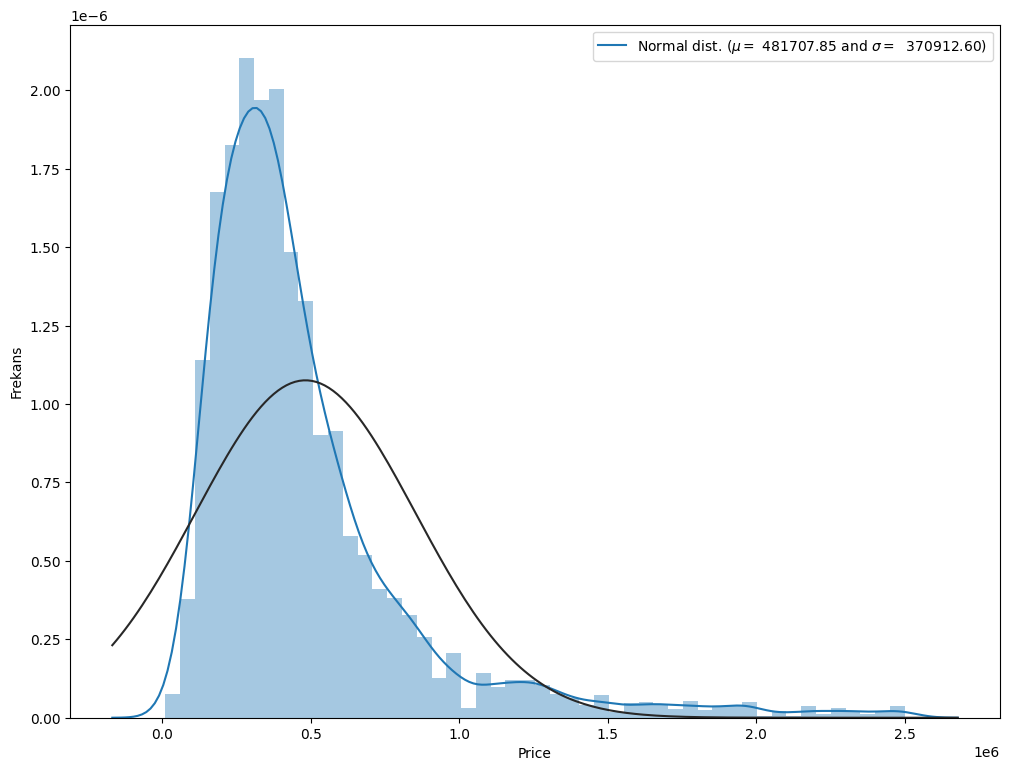

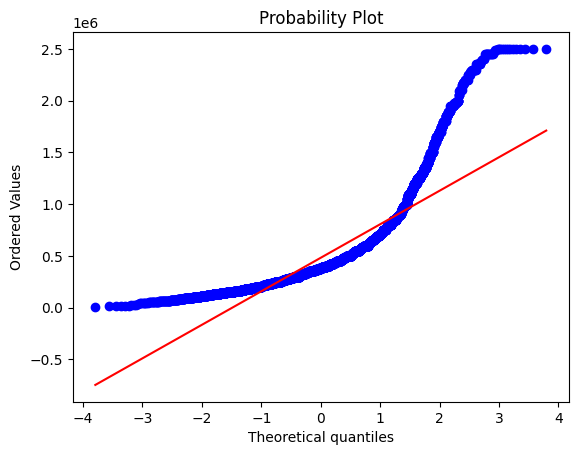

In [269]:
plt.subplots(figsize=(12, 9))
sns.distplot(house_df['Price'], fit = stats.norm)

(mu, sigma) = stats.norm.fit(house_df['Price'])

#Şimdi oluşturduğumuz dağılımı çizdirelim.
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma = $ {: .2f})'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frekans')

#Olasılık durumunuda çizdirelim
fig = plt.figure()
stats.probplot(house_df['Price'], plot = plt)
plt.show()

/var/folders/lh/rbpzcs3522qg45v9lc_xvgyc0000gn/T/ipykernel_39642/4007975713.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['Price'], fit = stats.norm)


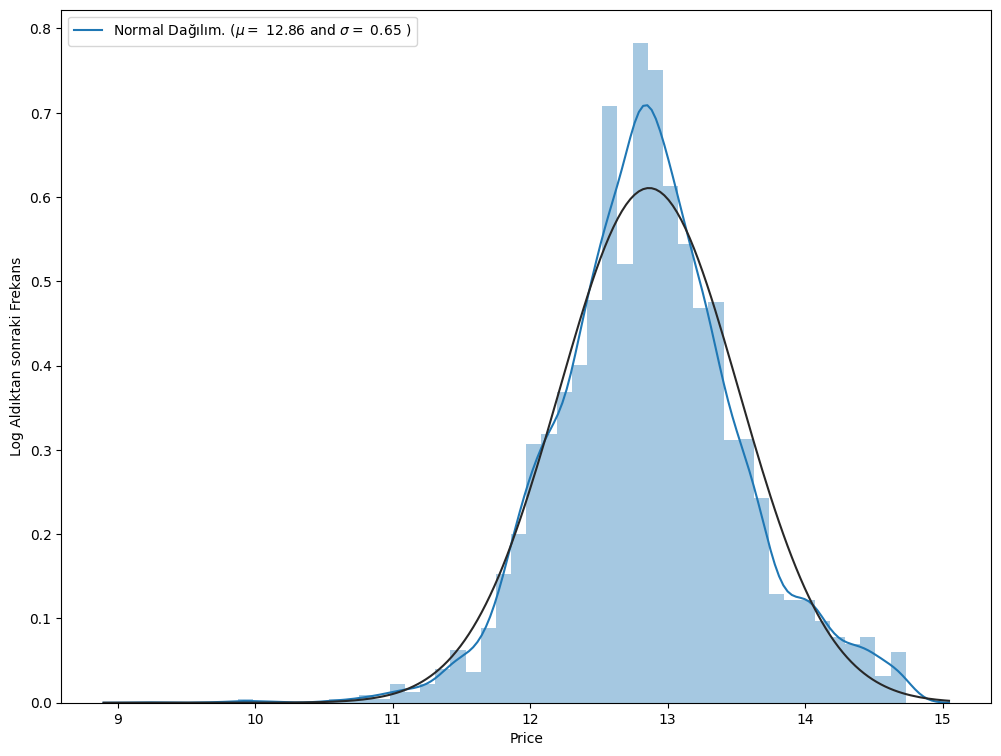

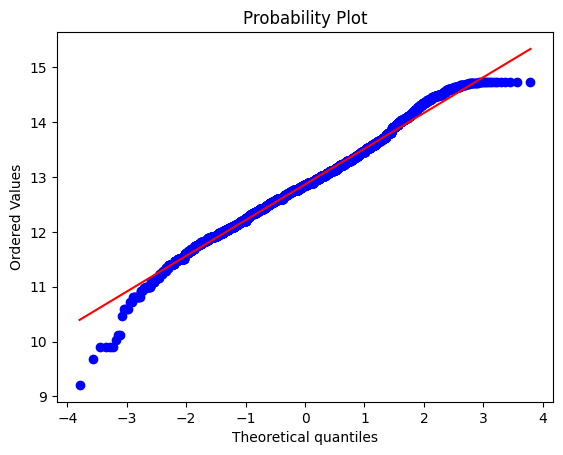

In [270]:
house_df['Price'] = np.log1p(house_df['Price'])

#Şimdi normal dağılımı tekrar kontrol edelim

plt.subplots(figsize =(12, 9))
sns.distplot(house_df['Price'], fit = stats.norm)

#
(mu, sigma) = stats.norm.fit(house_df['Price'])

#Şimdi dağılımı görselleştirelim
plt.legend(['Normal Dağılım. ($\mu=$ {:.2f} and $\sigma = $ {:.2f} )' .format(mu, sigma)], loc = 'best')
plt.ylabel('Log Aldıktan sonraki Frekans')

#Olasılık durumunu görselleştirelim
fig = plt.figure()
stats.probplot(house_df['Price'], plot = plt)
plt.show()

In [271]:
y = house_df[['Price']]
X = house_df[[
       'Building Cond. values',
       'Number of facades',
       'Number of rooms',
       'Living area',
       'Kitchen values',
       'Surface of the land',
       'Terrace surface',
       'Garden surface','Open fire',
       'Swimming pool'
       ]]

In [272]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) 

In [273]:
lm = LinearRegression() 

reg = lm.fit(X_train,y_train)

reg.score(X, y)

0.397227724732911

In [274]:
coeff_df = pd.DataFrame(lm.coef_.T,X.columns,columns=['Coefficient'])

In [275]:
coeff_df

,Coefficient
Building Cond. values,1.523491e-01
Number of facades,1.156675e-01
Number of rooms,1.761957e-01
Living area,7.305671e-06
Kitchen values,1.007749e-01
Surface of the land,1.173060e-05
Terrace surface,9.975727e-05
Garden surface,2.404810e-07
Open fire,1.594962e-01
Swimming pool,3.705850e-01


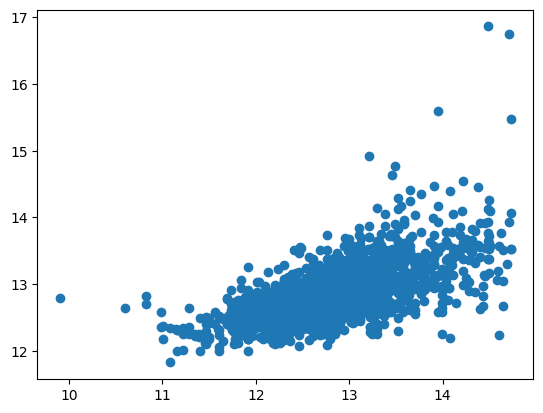

In [276]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

/var/folders/lh/rbpzcs3522qg45v9lc_xvgyc0000gn/T/ipykernel_39642/1061164399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: ylabel='Density'>

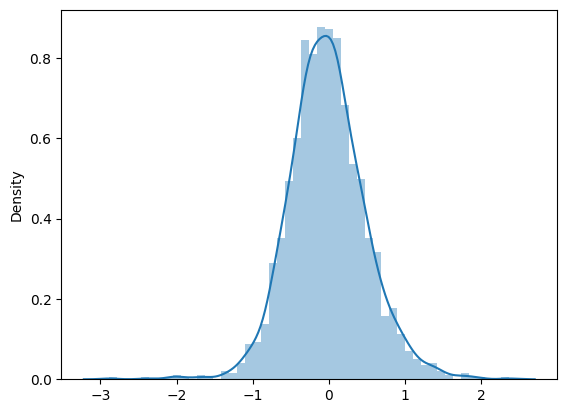

In [277]:
sns.distplot((y_test-predictions),bins=50)

In [278]:
reg = lm.fit(X_train,y_train)

In [279]:
print("House DataFrame shape (before): ",house_df.shape)
print("House data min (with outliers): ",house_df['Price'].min())
print("House data max (with outliers): ",house_df['Price'].max())

from typing import List
# Remove outliers
def remove_outliers(df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

new_housedf = remove_outliers(house_df, ['Price'], 1)

print("_"*30)
print("House DataFrame shape (after removing): ",new_housedf.shape)
print("House data min (without outliers): ", new_housedf['Price'].min())
print("House data max (without outliers): ", new_housedf['Price'].max())

House DataFrame shape (before):  (9344, 16)
House data min (with outliers):  9.210440366976517
House data max (with outliers):  14.731801689838349
Working on column: Price
______________________________
House DataFrame shape (after removing):  (7957, 16)
House data min (without outliers):  9.210440366976517
House data max (without outliers):  13.51440681653079


In [280]:
y = new_housedf[['Price']]
X = new_housedf[[
       'Building Cond. values',
       'Number of facades',
       'Number of rooms',
       'Living area',
       'Kitchen values',
       'Surface of the land',
       'Terrace surface',
       'Garden surface','Open fire',
       'Swimming pool'
       ]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

lm = LinearRegression() 
reg = lm.fit(X_train,y_train)
reg.score(X, y)

0.29826635108291977

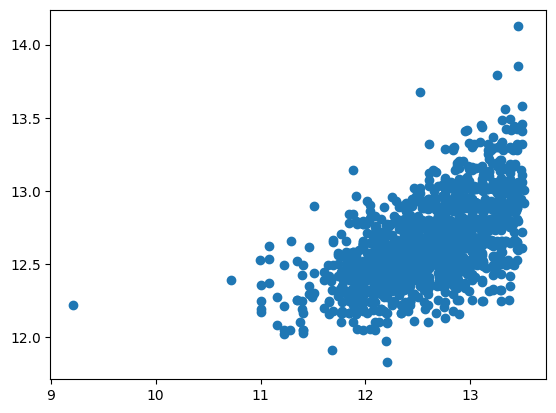

In [281]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)